## 1. Series 
A Series is a one-dimensional, homogeneous array-like data structure containing a vector of data (of any valid NumPy type) and an associated array of data labels, called its index.

## 1.1 Creation 
A Series can be created by calling the pd.Series() function on a NumPy 1D array or a Python object (like list, tuple, dictionary.) The index of the Series could be constructed in the same way from one of these objects. If the index isn't explicitly specified, a numeric (from 0 to length-1) index is automatically generated. Additionally, the user may specify the type and a name while declaring a Series.



In [1]:
import numpy as np
import pandas as pd

## Create a Series from ndarray
If data is an ndarray, then index passed must be of the same length. If no index is passed, then by default index will be range(n) where n is array length, i.e., [0,1,2,3…. range(len(array))-1]

In [72]:
x=np.array(['a','b','c','d'])
y=pd.Series(x)
y

0    a
1    b
2    c
3    d
dtype: object

In [74]:
x=np.array(['a','b','c','d'])
y=pd.Series(x,index=[101,102,103,104])
y

101    a
102    b
103    c
104    d
dtype: object

## Create a Series from Scalar
If data is a scalar value, an index must be provided. The value will be repeated to match the length of index

In [75]:
x=pd.Series(6,index=[0,1,2,3,4])
x

0    6
1    6
2    6
3    6
4    6
dtype: int64

## Accessing Data from Series with Position
Data in the series can be accessed similar to that in an ndarray.
Retrieve the first element. As we already know, the counting starts from zero for the array, which means the first element is stored at zeroth position and so on.

In [77]:
x=pd.Series([1,2,3,4,5,],index=['a','b','c','d','e'])
x[2]

3

##  Example 2
Retrieve the first three elements in the Series. If a : is inserted in front of it, all items from that index onwards will be extracted. If two parameters (with : between them) is used, items between the two indexes (not including the stop index)
    

In [79]:
x=pd.Series([1,2,3,4,5,],index=['a','b','c','d','e'])
x[::2]

a    1
c    3
e    5
dtype: int64

## Retrieve Data Using Label (Index)
A Series is like a fixed-size dict in that you can get and set values by index label
Retrieve a single element using index label value

In [83]:
x=pd.Series([1,2,3,4,5],index=['a','b','c','d','e'])
x['b']

2

In [86]:
# Retrieve multiple elements using a list of index label values.

x=pd.Series([1,2,3,4,5],index=['a','b','c','d','e'])
x[['c','e','b']]

c    3
e    5
b    2
dtype: int64

In [67]:
# Basic Series with an array, no index

x1=pd.Series(np.random.random(5).round(2))
x1

0    0.72
1    0.66
2    0.63
3    0.78
4    0.31
dtype: float64

##
Here, we created a series called series_1 using an array of 5 elements filled with random numbers. The type was induced from the data to be float64 and a numeric index was automatically generated. Note that this series has no name.
 

In [68]:
x2=pd.Series(np.random.randint(0,10,5),index=list('abcde'),dtype=float,name='x2')
x2

a    9.0
b    6.0
c    4.0
d    1.0
e    7.0
Name: x2, dtype: float64

##
We create a series of random integers, but convert the type to float explicitly. The automatic index is replaced by the one we provide. The name S2 is important as it will later become the column name if this Series is imported into a DataFrame## 

In [69]:
#  From a numeric list

x=pd.Series([-55,5.3,78,89])
x

0   -55.0
1     5.3
2    78.0
3    89.0
dtype: float64

In [5]:
#  From a tuple 

x=pd.Series((5,9,6,7,3))
x

0    5
1    9
2    6
3    7
4    3
dtype: int64

In [6]:
#  From a dictionary 
# Note that when we use a Python dict to create a Series, the keys become the index.

x=pd.Series({'a':78,'b':56,'c':67,'d':90})
x

a    78
b    56
c    67
d    90
dtype: int64

 A series can be converted into a list or a dictionary using methods like tolist() and to_dict()
## 1.2 Series Attributes 
Just like attributes for primitive Python data structures like Lists or Dictionaries provide useful metadata about the contents of the structure, we can use Series attributes like values,  index, shape


In [7]:
x2

a    1.0
b    9.0
c    7.0
d    1.0
e    3.0
Name: x2, dtype: float64

In [8]:
x2.values     # Get the underlying NumPy array 

array([1., 9., 7., 1., 3.])

In [9]:
x2.index       # Get the index 

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [10]:
x2.nbytes      # get the size on disk

40

In [11]:
x2.shape       # get the number elements

(5,)

## Subsetting the Series
There are many ways to extract subsets of a Series in Pandas. In addition to allowing NumPy-like subsetting using integer lists and slices, it is possible to subset a Series using label-based indexing by passing index labels associated with the values fancy indexing using methods like loc, iloc, ix, at, iat boolean indexing for subsetting with logical arrays
Example: Label and integer based indexing on a Vegetable List

In [12]:
# Example:Label and Interger based indexing on a vegetable list

veg=pd.Series({'potatoa':2,'tomato':3,'lady finger':1,'chily':15,'pumpkin':5,'onion':6})
veg

potatoa         2
tomato          3
lady finger     1
chily          15
pumpkin         5
onion           6
dtype: int64

In [13]:
# a single label

veg['lady finger']

1

In [14]:
veg[['potatoa','tomato']]    # A list of labels

potatoa    2
tomato     3
dtype: int64

In [15]:
veg['chily':'onion']    #  A slice of labels

chily      15
pumpkin     5
onion       6
dtype: int64

In [16]:
# Another label of slice

veg['tomato':]

tomato          3
lady finger     1
chily          15
pumpkin         5
onion           6
dtype: int64

In [17]:
#  Positional Slicing 

veg[2:5]

lady finger     1
chily          15
pumpkin         5
dtype: int64

In [18]:
#  More positional slicing 

veg[1::2]

tomato     3
chily     15
onion      6
dtype: int64

In [19]:
# Reversing the Series

veg[::-2]

onion      6
chily     15
tomato     3
dtype: int64

##
Subsetting with fancy indexing methods .loc() for label based subsetting .iloc() for integer based subsetting
Note that other methods such as .ix() and .at(), .iat() exist, but they serve the same purpose. So we will leave it to the reader to explore these functions in the documentation.
 

In [20]:
# Using loc

veg.loc['chily']

15

In [21]:
veg.loc['lady finger':'onion']

lady finger     1
chily          15
pumpkin         5
onion           6
dtype: int64

In [22]:
# Using iloc

veg.iloc[:3]

potatoa        2
tomato         3
lady finger    1
dtype: int64

In [23]:
veg.iloc[2:4]

lady finger     1
chily          15
dtype: int64

## Create a boolean series using a logical comparison
boolean indexing works in the same way as it does for subsetting NumPy arrays. We create a boolean of the same length as the Series, (using the same Series), and then pass the boolean to the squre bracket subsetter. 
In 

In [24]:
veg>2

potatoa        False
tomato          True
lady finger    False
chily           True
pumpkin         True
onion           True
dtype: bool

In [25]:
veg<2

potatoa        False
tomato         False
lady finger     True
chily          False
pumpkin        False
onion          False
dtype: bool

In [26]:
#  Subset the series using the boolean to retain values where True 

veg[veg>1]

potatoa     2
tomato      3
chily      15
pumpkin     5
onion       6
dtype: int64

In [27]:
veg[veg>2]

tomato      3
chily      15
pumpkin     5
onion       6
dtype: int64

In [28]:
veg[veg<2]

lady finger    1
dtype: int64

In [29]:
#  We can also pass any boolean (needs to be of the same length)

veg[[True,True,False,True,False,True]]

potatoa     2
tomato      3
chily      15
onion       6
dtype: int64

## Important Series Methods 
We've just seen a few Series methods that allow us to subset data. There's a variety of other methods that are useful across the entire spectrum of data wrangling tasks. The figure below shows an exhaustive list of all methods. We will discuss some the most important ones of these here, and encourage the readers to peruse the latest pandas documentation to explore other methods

# Peeking at the data 
head and tail  are used to view a small sample of a Series or DataFrame object, use the head() and tail() methods. The default number of elements to display is five, but you may pass a custom number.
 

In [30]:
a=pd.Series(np.random.randn(50).round(2))
a.head()

0   -0.45
1    0.54
2   -1.00
3   -0.25
4    0.38
dtype: float64

In [31]:
a.tail()

45    0.32
46   -0.26
47   -1.22
48   -0.18
49   -0.48
dtype: float64

## Type Conversion 
astype explicitly convert dtypes from one to another


## Treating Outliers 
clip_upper, clip_lower can be used to clip outliers at a threshold value. All values lower than the one supplied to clip_lower , or higher than the one supplied to clip_upper will be replaced by that value. Note how the values in series_8 below are clipped at the supplied threshold of 0.50
This function is especially useful in treating outliers when used in conjunction with .quantile() [PB] In data wrangling, we generally clip values at the 1st-99th Percentile (or the 5th-95th percentile)


In [32]:
a.astype(str).head()

0    -0.45
1     0.54
2     -1.0
3    -0.25
4     0.38
dtype: object

In [33]:
a.clip_upper(.28).head()

0   -0.45
1    0.28
2   -1.00
3   -0.25
4    0.28
dtype: float64

In [34]:
a.clip_lower(.33).head()

0    0.33
1    0.54
2    0.33
3    0.33
4    0.38
dtype: float64

## Replacing Values 
replace is an effective way to replace source values with target values by suppling a dictionary with the required substitutions. 
In 

In [35]:
clths=pd.Series(['jeans','t-shirt','shirt','kurta','pants'])
clths

0      jeans
1    t-shirt
2      shirt
3      kurta
4      pants
dtype: object

In [36]:
clths.replace({'jeans':'shorts','kurta':'suit'})

0     shorts
1    t-shirt
2      shirt
3       suit
4      pants
dtype: object

## Checking if values belong to a list 
isin produces a boolean by comparing each element of the Series against the provided list. It takes True if the element belongs to the list. This boolean may then be used for subsetting the Series. 
 

In [37]:
clths.isin(['kurta','jeans'])

0     True
1    False
2    False
3     True
4    False
dtype: bool

## Finding uniques and their frequency 
unique, nunique, value_counts These methods are used to find the array of distinct values in a categorical Series, to count the number of distinct items, and to create a frequency table respectively.


In [38]:
a1=pd.Series(list('abcde'*4))
a1

0     a
1     b
2     c
3     d
4     e
5     a
6     b
7     c
8     d
9     e
10    a
11    b
12    c
13    d
14    e
15    a
16    b
17    c
18    d
19    e
dtype: object

In [39]:
a1.unique()

array(['a', 'b', 'c', 'd', 'e'], dtype=object)

In [40]:
a1.nunique()

5

In [41]:
a1.value_counts()

e    4
c    4
a    4
b    4
d    4
dtype: int64

## Dealing with Duplicates 
duplicated produces a boolean that marks every instance of a value after its first occurrence as True. drop_duplicates returns the Series with the duplicates removed. If you want to drop duplicated permanently, pass the inplace=True argument.


In [42]:
a1.duplicated()

0     False
1     False
2     False
3     False
4     False
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
dtype: bool

In [43]:
a1.drop_duplicates()

0    a
1    b
2    c
3    d
4    e
dtype: object

## Finding the largest/smallest values 
idxmax, idxmin, nlargest, nsmallest As their names imply, these methods help in finding the largest, smallest, n-largest and n-smallest respectively. Note that the index label is returned with these values, and this can be especially helpful in many cases.


In [44]:
x1=pd.Series(np.random.randint(0,40,6),index=list('xyzefg'))
x1

x     0
y    39
z    24
e    31
f     0
g     1
dtype: int32

In [45]:
x1.idxmax()

'y'

In [46]:
x1.idxmin()

'x'

In [47]:
x1.nlargest()

y    39
e    31
z    24
g     1
x     0
dtype: int32

In [48]:
x1.nsmallest()

x     0
f     0
g     1
z    24
e    31
dtype: int32

## Sorting the data 
sort_values , sort_index help in sorting a Series by values or by index. Note: that in order to make the sorting permanent, we need to pass an inplace=True argument.


In [49]:
x1.sort_values()

x     0
f     0
g     1
z    24
e    31
y    39
dtype: int32

In [50]:
x1.sort_index()

e    31
f     0
g     1
x     0
y    39
z    24
dtype: int32

## Mathematical Summaries 
mean, median, std, quantile, describe are mathematical methods employed to find the measures of central tendency for a given set of data points. quantile finds the requested percentiles, whereas describe produces the summary statistics for the data. These functions come in handy when we're exploring data for patterns.


In [87]:
z=pd.Series(np.random.randn(1000))
z.head()

0   -0.212485
1   -0.805883
2   -1.573792
3    0.481394
4    0.876790
dtype: float64

In [88]:
z.mean()

-0.03782863193541292

In [89]:
z.std()

0.9822590969632325

In [90]:
z.median()

-0.01174766070710519

In [94]:
z.quantile([0.10,0.20,0.40])

0.1   -1.282763
0.2   -0.869390
0.4   -0.283723
dtype: float64

In [96]:
z.describe()

count    1000.000000
mean       -0.037829
std         0.982259
min        -3.567338
25%        -0.725275
50%        -0.011748
75%         0.615152
max         2.913648
dtype: float64

## Dealing with missing data 
isnull, notnull are complementary methods that work on a Series with missing data to produce boolean Series to identify missing or non-missing values respectively. Note that both the NumPy np.nan and the base Python None type are identified as missing values.

In [51]:
x3=pd.Series([2.5,56,35,np.nan,3.14,np.nan,85])
x3

0     2.50
1    56.00
2    35.00
3      NaN
4     3.14
5      NaN
6    85.00
dtype: float64

In [52]:
x3.isnull()

0    False
1    False
2    False
3     True
4    False
5     True
6    False
dtype: bool

In [53]:
x3.notnull()

0     True
1     True
2     True
3    False
4     True
5    False
6     True
dtype: bool

## Missing Values Imputation 
fillna, ffill and bfill, dropna This set of Series methods allow us to deal with missing data by choosing to either impute them with a particular value, or by copying the last known value over the missing ones (typically used in time-series analysis.) We may sometimes want to drop the missing data altogether and dropna helps us in doing that.
Note: It is a common practice in data science to replace missing values in a numeric variable by its mean (or median if the data is skewed) and in categorical variables with its mode.


In [54]:
x3

0     2.50
1    56.00
2    35.00
3      NaN
4     3.14
5      NaN
6    85.00
dtype: float64

In [55]:
x3.fillna(9.10)

0     2.50
1    56.00
2    35.00
3     9.10
4     3.14
5     9.10
6    85.00
dtype: float64

In [56]:
x3.fillna(x3.mean())

0     2.500
1    56.000
2    35.000
3    36.328
4     3.140
5    36.328
6    85.000
dtype: float64

In [57]:
x3.ffill()      # first fill()

0     2.50
1    56.00
2    35.00
3    35.00
4     3.14
5     3.14
6    85.00
dtype: float64

In [58]:
x3.bfill()      # Back fill()

0     2.50
1    56.00
2    35.00
3     3.14
4     3.14
5    85.00
6    85.00
dtype: float64

In [59]:
x3.dropna()

0     2.50
1    56.00
2    35.00
4     3.14
6    85.00
dtype: float64

## Apply a function to each element 
 map is perhaps the most important of all Series methods. It takes a general-purpose or user-defined function and applies it to each value in the Series. Combined with base Python's lambda functions, it can be an incredibly powerful tool in transforming a given Series.
Some of you should've recalled by now that this sounds like the  map function for List objects in Base Python. The .map() method can be understood as a wrapper around that function.
 

In [60]:
#  Let's say we have a list of names stored in a Series

s1=pd.Series(['anjali singh','anuj yadav','divya thakur','aman arya','abhijeet jimon mathew'])
s1

0             anjali singh
1               anuj yadav
2             divya thakur
3                aman arya
4    abhijeet jimon mathew
dtype: object

In [61]:
#  Find the length of each name   

s1.map(lambda x:len(x))

0    12
1    10
2    12
3     9
4    21
dtype: int64

In [62]:
#   Find the initials 

s1.map(lambda x: '.'.join([i[0]for i in x.split(' ')]))

0      a.s
1      a.y
2      d.t
3      a.a
4    a.j.m
dtype: object

## Visualize the Data 
The plot method is a gateway to a treasure trove of potential visualizations like histograms, bar charts, scatterplots, boxplots and more. As examples, we will visualize the histogram of a numeric variable, and the bar chart for a categorical series.


In [63]:
#  Create a categorical series

plt=pd.Series(list('a'*3)+list('b'*4)+list('c'*5)+list('d'*6))
plt

0     a
1     a
2     a
3     b
4     b
5     b
6     b
7     c
8     c
9     c
10    c
11    c
12    d
13    d
14    d
15    d
16    d
17    d
dtype: object

In [64]:
plt.value_counts().plot.bar()

In [65]:
plt1=pd.Series(np.random.randn(50))
plt1.head()

0   -0.222053
1   -0.122313
2   -1.659922
3    0.637820
4    1.294929
dtype: float64

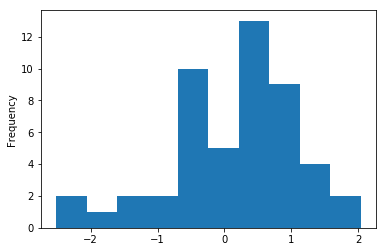

In [66]:
plt1.plot.hist()